In [1]:
import spacy
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

cm = sns.light_palette("red", as_cmap=True)
nlp = spacy.load('en_core_web_lg')

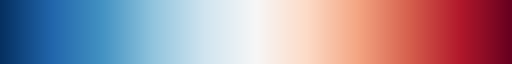

In [2]:
import matplotlib.pyplot as plt

plt.cm.RdBu_r

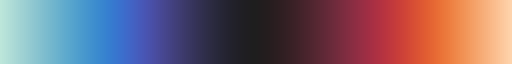

In [3]:
sns.cm.icefire

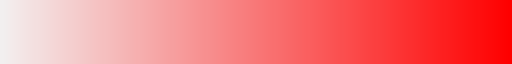

In [4]:
cm

In [5]:
from termcolor import colored

print(f"similarity:{colored('hello', 'cyan')}")

similarity:hello


In [6]:
words = ['cat', 'dog', 'car', 'bird', 'eagle', 'milk', 'fly']

In [7]:
vectors=[nlp(w).vector for w in words]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
simi=cosine_similarity(vectors,vectors)

In [10]:
    pd.DataFrame(simi,columns=words,index=words).style.background_gradient(cmap=plt.cm.bwr)

,cat,dog,car,bird,eagle,milk,fly
cat,1.000000,0.801685,0.319075,0.523687,0.324779,0.302994,0.231880
dog,0.801685,1.000000,0.356292,0.478755,0.289382,0.324522,0.264414
car,0.319075,0.356292,1.000000,0.223812,0.228690,0.154687,0.283707
bird,0.523687,0.478755,0.223812,1.000000,0.572219,0.248045,0.524831
eagle,0.324779,0.289382,0.228690,0.572219,1.000000,0.150694,0.378893
milk,0.302994,0.324522,0.154687,0.248045,0.150694,1.000000,0.107911
fly,0.231880,0.264414,0.283707,0.524831,0.378893,0.107911,1.000000


vectors generated by Spacy gained from pre-trained GloVe model

In [11]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
              
X_train, y_train = fetch_20newsgroups(categories=categories, 
                          remove=('headers', 'footers', 'quotes'), return_X_y=True)
X_test, y_test = fetch_20newsgroups(categories=categories, 
                          remove=('headers', 'footers', 'quotes'), return_X_y=True, subset='test')

In [12]:
pd.value_counts(y_train)

C:\Users\mhmed\AppData\Local\Temp\ipykernel_2500\4046760108.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train)


3    599
2    594
1    584
0    480
Name: count, dtype: int64

In [13]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
stop=nltk.corpus.stopwords.words('english')

In [14]:
# creat tag map between treebank and wordnet
# tree bank : collection of syntactically annotated sentences
tag_map = {
"CC": None, #formatted. conjunction (and, but, or)
'CD': wn.NOUN, # original number (one,two)
'DT': None, # delimiter (a, the)
'EX': wn.ADV, #and my "there" (there)
"FW": None, # foreign word (mea culpa)
"IN": wn.ADV,# preposition/subjunctive conjunction (of, in,by) 
'JJ': [wn.ADJ, wn.ADJ_SAT],# adjective # (yellow)
'JJR': [wn.ADJ, wn.ADJ_SAT], # add, comparator (larger)
"JJS": [wn.ADJ, wn.ADJ_SAT], # add, superlative (wildest)
"LS": None, #list item tag(1,2,One)
'MD': None, # modal (can, should)
'NN': wn.NOUN, #noun, sing. or nugget (llama)
'NNS': wn.NOUN, #noun, plural (Llamas)
"NNP": wn.NOUN, # proper noun, vocals. (IBM)
'NNPS': wn.NOUN, # proper noun, plural (Carolina)
"PDT": [wn.ADJ, wn.ADJ_SAT], # predeterminer (all, both)
'POS':None, # end of ownership
'PRP': None, # personal pronoun (I, you, he)
'prp$': None, # possessive pronoun (your, one's)
"RB": wn.ADV, #adv (quickly, never)
'RBR': wn.ADV, # adverb, comparative (faster)
'RBS':wn.ADV,# adverb, superlative (fastest)
'RP': [wn.ADJ, wn.ADJ_SAT], # particle (up, off)
'SYM': None, #symbol, # (+, %, &)
'TO': None, # 'to' (to)
'UH': None, # interjection (uh, oops)
'VB': wn.VERB,# verb base form # (eat)
'VBD': wn.VERB, # verb past tense (eat)
'VBG': wn.VERB, #verb gerund (to eat)
'VBN': wn.VERB, # past participle (eaten)
"VBP": wn.VERB, #non-3sg pres verb (eat)
'VBZ': wn.VERB,# verb зsg pres (egts) 
}

In [15]:
lemma=WordNetLemmatizer()
def get_lemma(text):
    l=[]
    tags=pos_tag(text.split())
    for token,tag in tags:
        try:
             l.append(lemma.lemmatize(token,pos=tag_map[tag][0]))
        except:
            continue
    return l

In [16]:
from termcolor import colored
def cleaning(df):
    """
    - remove empty strings
    - remove duplicates
    """
    # remove empty string
    blanks=[]
    for i ,v in df.itertuples():
        if v.isspace() ==True or v=='':
            blanks.append(i)
    if len(blanks)>0:
        df=df.drop(blanks)
        print(f"found {colored(len(blanks),'red')} blanks")
    else:
        print("no blanks found")

    # remove duplicates
    if df.duplicated().sum() !=0:
        print(f"dropped {colored(df.duplicated().sum(),'red')} : values")
        df=df.drop_duplicates()
    else:
        print("no duplicates found")
    return df

In [17]:
import re
import string
def preprocessing(df,col):
    # lowercasing
    df[col]=df[col].apply(lambda x: " ".join(t.lower() for t in x.split()))
    # remove emails
    df[col]=df[col].apply(lambda x: re.sub("\S+\@\S+",'',x))
    # remove URls
    df[col]=df[col].apply(lambda x: re.sub("\S+\.\S+",'',x))
    # remove punctations
    df[col]=df[col].apply(lambda x: re.sub(f'[{re.escape(string.punctuation)}]',' ',x))
    # remove stopwords
    df[col]=df[col].apply(lambda x :" ".join(t for t in x.lower().split() if t not in stop))
    # remove \n or \t
    df[col]=df[col].apply(lambda x: re.sub('\n|\t',' ',x))
    # remove 2 characters words
    df[col]=df[col].apply(lambda x: re.sub(r' \w\w ',' ',x) )
    # remove 1 character words
    df[col]=df[col].apply(lambda x: re.sub(r' \w ',' ',x) )
    # remove extra spaces more than or equals "2" 
    df[col]=df[col].apply(lambda x: re.sub(" {2,}",' ',x))
    # select alphapetical only
    df[col]=df[col].apply(lambda x: re.sub("[^a-z]+",' ',x) )
    # strip string
    df[col]=df[col].apply(lambda x: x.strip())
    # get lemma
    df[col]=df[col].apply(lambda x: " ".join(get_lemma(x)))
    return df

In [18]:
# remove empty strings  
# remove duplicates 
# remove 1 character words
# remove 2 characters words

In [19]:
x_train=pd.DataFrame(X_train,columns=['article'])
x_test=pd.DataFrame(X_test,columns=['article'])

In [20]:
cleaned_train=cleaning(x_train)
cleaned_test=cleaning(x_test)

found 49 blanks
dropped 1 : values
found 41 blanks
dropped 1 : values


In [21]:
prep_train=preprocessing(cleaned_train,col='article')
prep_test=preprocessing(cleaned_test,col='article')

In [22]:
prep_train.index

Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
       ...
       2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256],
      dtype='int64', length=2207)

In [23]:
y_train=y_train[prep_train.index]
y_test=y_test[prep_test.index]

In [24]:
train_v=np.zeros((len(prep_train),300))
test_v=np.zeros((len(prep_test),300))

In [25]:
from tqdm.auto import tqdm

In [26]:
for i,doc in tqdm(enumerate(nlp.pipe(prep_train['article'])),total=len(prep_train)):
    train_v[i,:] =doc.vector

  0%|          | 0/2207 [00:00<?, ?it/s]

In [27]:
for i,doc in tqdm(enumerate(nlp.pipe(prep_test['article'])),total=len(prep_test)):
    test_v[i,:] =doc.vector

  0%|          | 0/1460 [00:00<?, ?it/s]

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [29]:
clf=LinearSVC()
clf.fit(train_v,y_train)

LinearSVC()

In [30]:
print(classification_report(y_test, clf.predict(test_v), target_names=categories))

                        precision    recall  f1-score   support

           alt.atheism       0.69      0.60      0.64       311
soc.religion.christian       0.92      0.90      0.91       384
         comp.graphics       0.88      0.89      0.88       381
               sci.med       0.76      0.85      0.81       384

              accuracy                           0.82      1460
             macro avg       0.81      0.81      0.81      1460
          weighted avg       0.82      0.82      0.82      1460



In [31]:
import xgboost

In [32]:
clf=xgboost.XGBClassifier()

In [33]:
clf.fit(train_v,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [34]:
print(classification_report(y_test, clf.predict(test_v)))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       311
           1       0.88      0.94      0.91       384
           2       0.89      0.88      0.88       381
           3       0.81      0.85      0.83       384

    accuracy                           0.84      1460
   macro avg       0.83      0.83      0.83      1460
weighted avg       0.83      0.84      0.83      1460

